In [16]:
from src.utils import load_json, sanitize
from collections import defaultdict
from rdkit import Chem
from rdkit.Chem import Draw
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Load all known reaction json entries into dict
known_rxns = {}
pref = '../data/mapping/'
suffs = ['mc_v21_as_is.json', 'brenda_as_is.json', 'kegg_as_is.json']
for elt in suffs:
    known_rxns.update(load_json(pref + elt))

In [5]:
cpd2rid = defaultdict(list)
for rid, entry in known_rxns.items():
    cpds = [v for k,v in entry[0].items()] + [v for k,v in entry[1].items()]
    cpds = list(set(sanitize(cpds)))
    for elt in cpds:
        if elt:
            cpd2rid[elt].append(rid)

[14:38:10] Explicit valence for atom # 26 O, 3, is greater than permitted
[14:38:10] Explicit valence for atom # 26 O, 3, is greater than permitted
[14:38:10] Explicit valence for atom # 26 O, 3, is greater than permitted
[14:38:10] Explicit valence for atom # 26 O, 3, is greater than permitted
[14:38:10] Explicit valence for atom # 17 Mg, 3, is greater than permitted
[14:38:10] Explicit valence for atom # 17 Mg, 3, is greater than permitted
[14:38:10] Explicit valence for atom # 9 N, 4, is greater than permitted
[14:38:10] Explicit valence for atom # 9 N, 4, is greater than permitted
[14:38:10] Explicit valence for atom # 9 N, 4, is greater than permitted
[14:38:10] Explicit valence for atom # 9 N, 4, is greater than permitted
[14:38:10] Explicit valence for atom # 17 Mg, 3, is greater than permitted
[14:38:10] Explicit valence for atom # 16 Mg, 4, is greater than permitted
[14:38:10] Explicit valence for atom # 16 Mg, 4, is greater than permitted
[14:38:10] Explicit valence for atom 

In [7]:
len(cpd2rid), len(known_rxns)

(24502, 91034)

In [12]:
# Load Quan's retrosynthesis mols

big_set_path = '../data/molecules_with_structure.txt'
pubchem_path = '../data/molecules_in_pubchem.txt'

with open(big_set_path, 'r') as f:
    big_set = f.read().splitlines()

with open(pubchem_path, 'r') as f:
    pubchem = f.read().splitlines()

In [13]:
# Search bio dbs

bio_pubchem = [elt for elt in pubchem if elt in cpd2rid]
bio_bs = [elt for elt in big_set if elt in cpd2rid]

print(len(bio_pubchem), len(bio_bs))

30 30


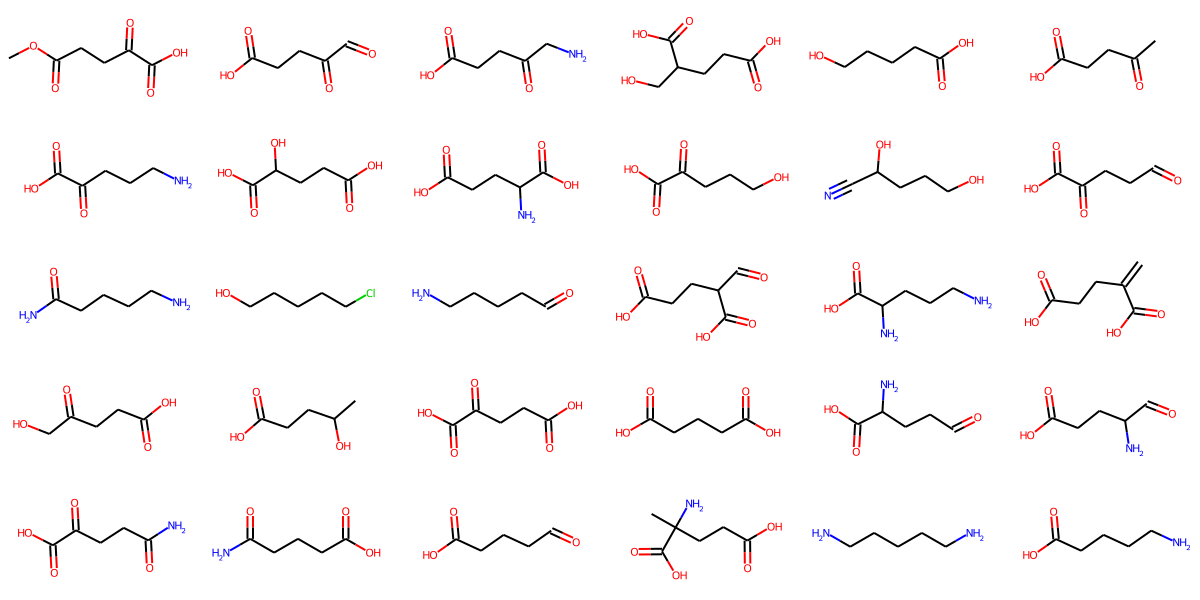

In [22]:
bio_mols = [Chem.MolFromSmiles(elt) for elt in bio_bs]

img = Draw.MolsToGridImage(bio_mols, molsPerRow=6, subImgSize=(200, 120))
img.save('../artifacts/bio_mols_from_mvacid_retrosynthesis.png')
# with open('../artifacts/bio_mols_from_mvacid_retrosynthesis.png', 'wb') as f:
#     f.write(img.data)
img
